# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [2]:
df=pd.read_csv("Cardiotocographic.csv")


# Data Cleaning and Preparation:

In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.drop(['DP','DS'], axis=1, inplace=True)


In [5]:
df.shape

(2126, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   ASTV      2126 non-null   float64
 6   MSTV      2126 non-null   float64
 7   ALTV      2126 non-null   float64
 8   MLTV      2105 non-null   float64
 9   Width     2105 non-null   float64
 10  Tendency  2105 non-null   float64
 11  NSP       2105 non-null   float64
dtypes: float64(12)
memory usage: 199.4 KB


In [7]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

nulls 1-5% Drop Row 6-40% Replace (Mean-no outliers ,Median-outliers,Mode-Object 50% Drop Column

In [8]:
# Calculate the percentage  of missing value in each column
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.99 %
0.94 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.99 %
0.99 %
0.99 %
0.99 %


In [9]:
data=df.dropna()

In [10]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

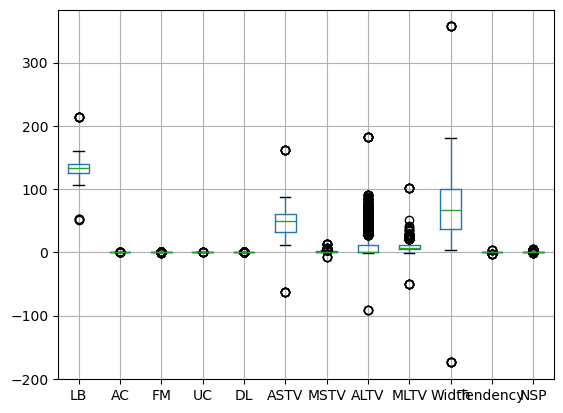

In [11]:
data.boxplot()
plt.show()

In [12]:
  def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df


In [13]:
cols = ['LB', 'FM', 'UC','AC','DL','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']  # your chosen columns
data = cap_outliers_iqr(data, cols)


C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\4257475936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\4257475936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\4257475936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


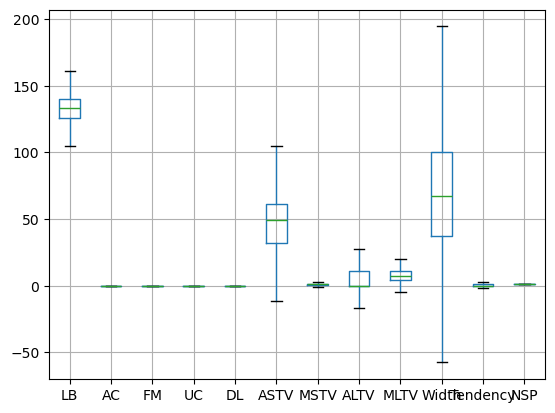

In [14]:
data.boxplot()
plt.show()


# Statistical Summary:

In [15]:
# RIFGT skew data (most like normal distribution) ,ASTV and Tendency liitle bit negatively skew

In [16]:
data.describe()


,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


# Data Visualization and ,	Pattern Recognition and Insights:

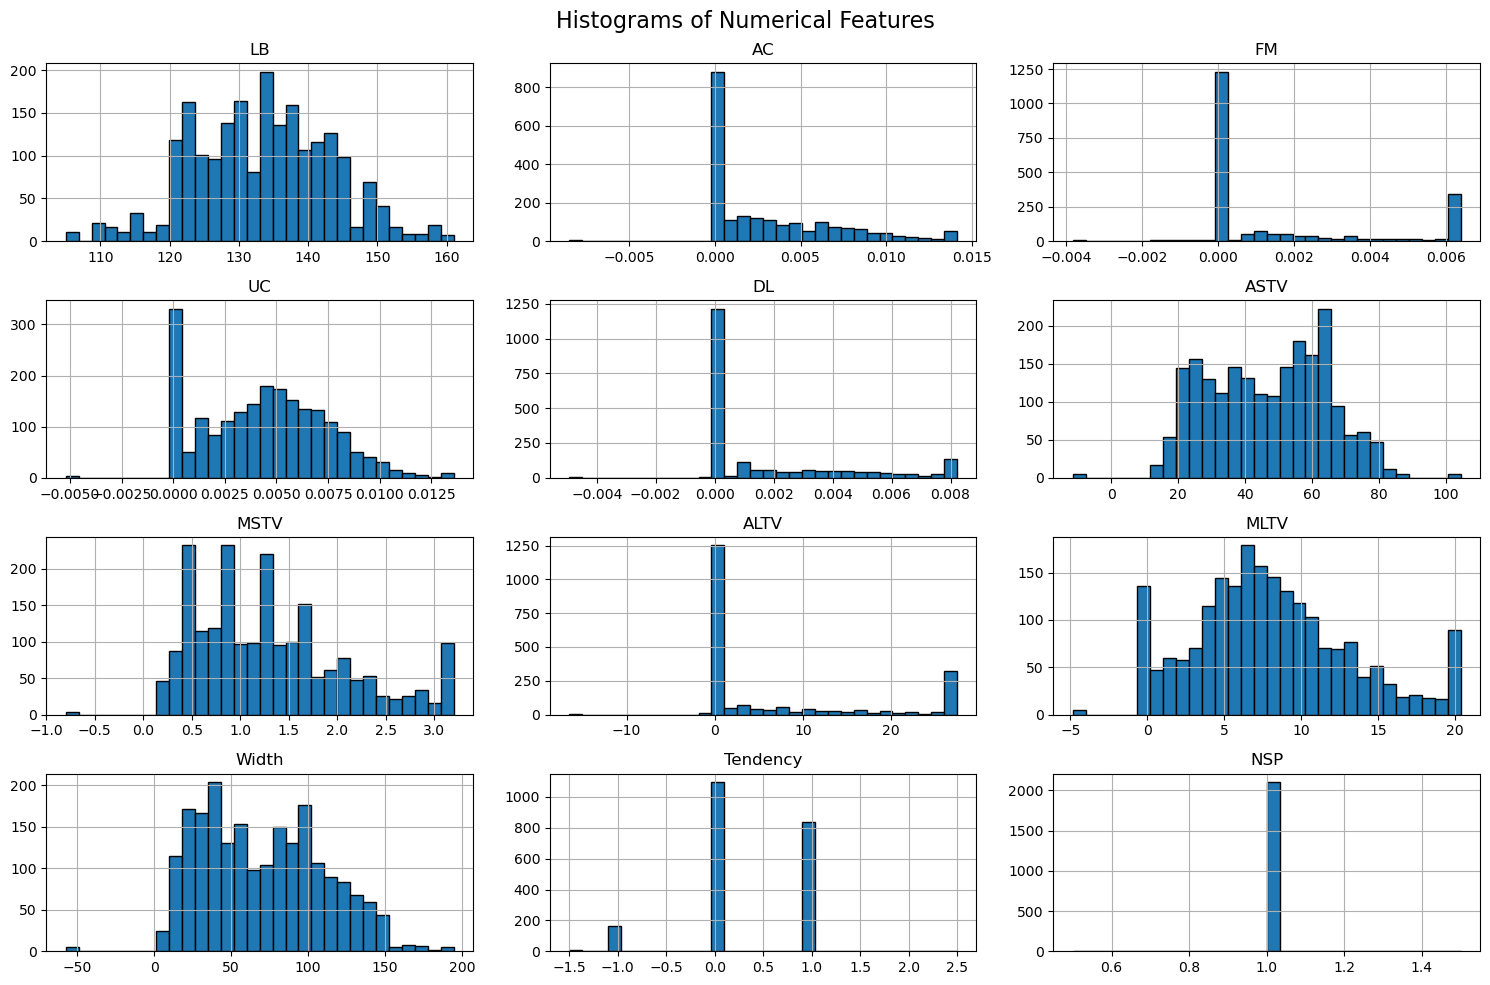

In [17]:
# 1. Histograms for numerical features
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#UC,ASTV columns are right skew
# columnd like UC,MLTV,MSTV,NSP,WIDTH seems like normal Distributed
# DL,MSTV,ALTV,WIDTH,TENDENCY Column little values are present on negative side (outliers)

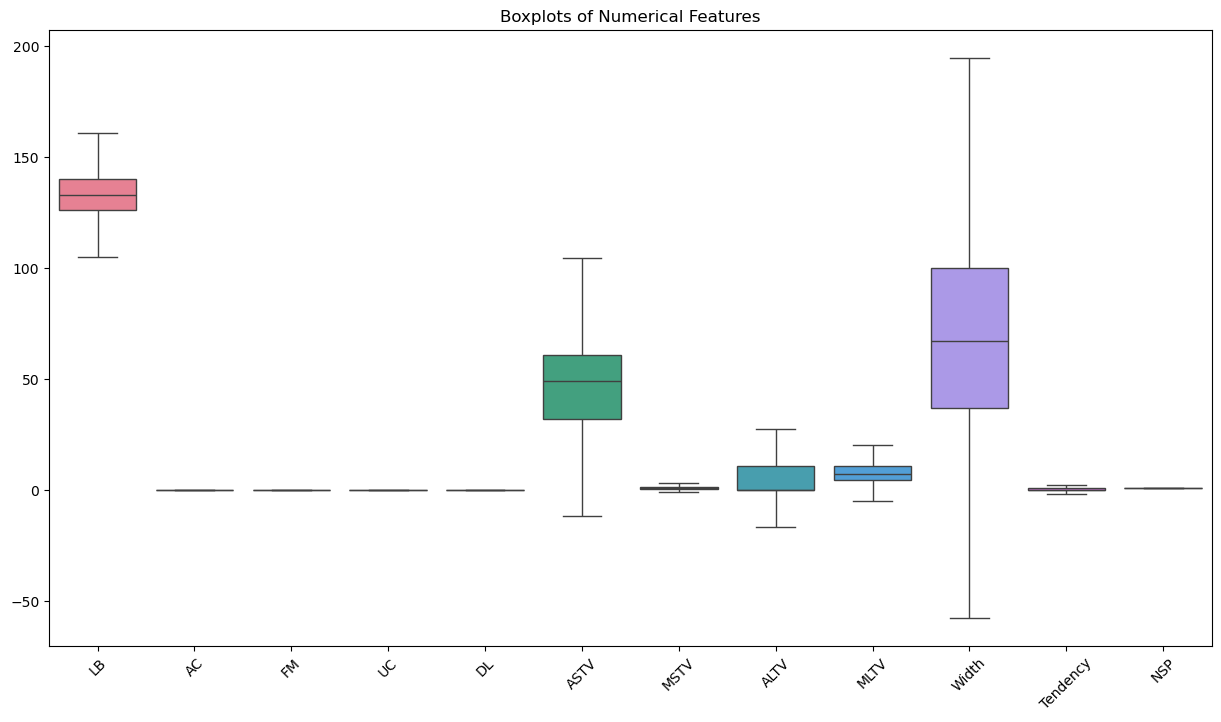

In [18]:
# 2. Boxplots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

#NO Outliers

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\3172466757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MSTV', data=data, palette='Set2')


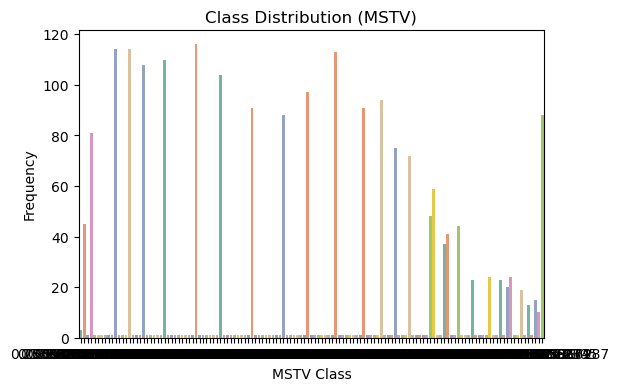

In [19]:
# 3. Bar chart for MSTV class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='MSTV', data=data, palette='Set2')
plt.title('Class Distribution (MSTV)')
plt.xlabel('MSTV Class')
plt.ylabel('Frequency')
plt.show()


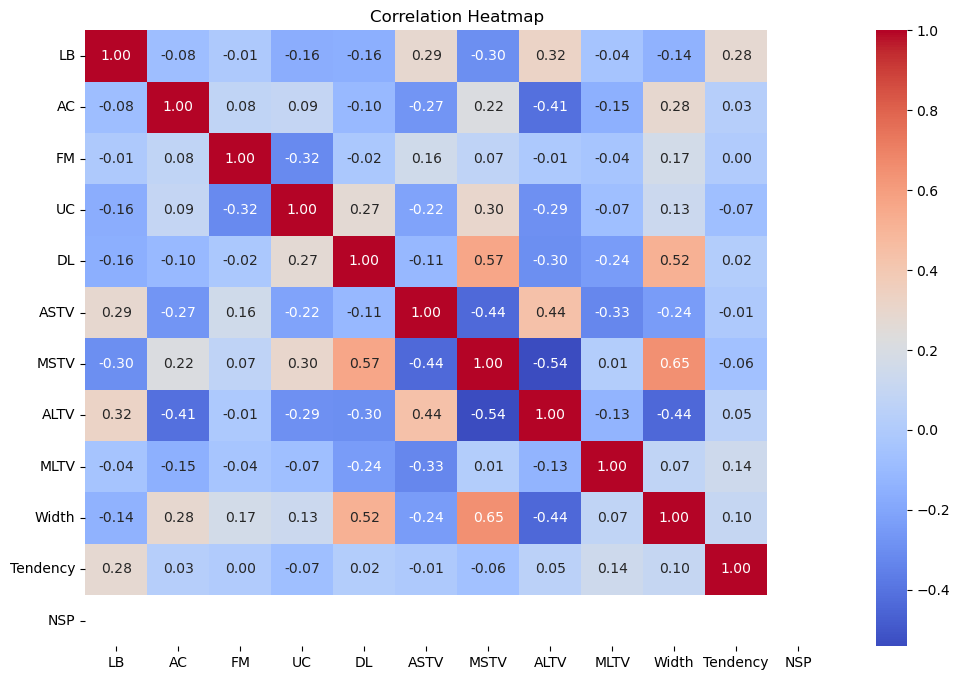

In [20]:
# correlation heatmmap
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# Observation:
# - The heatmap shows correlation between all numerical features.
# - Features like 'ASTV' and 'ALTV' have a strong positive correlation (r = 0.65), meaning as ASTV increases, ALTV also increases.
# - 'Min' and 'Mean' values of FHR (like 'Min', 'Mean', 'Median') are also moderately positively correlated.
# - There is very little to no negative correlation between most features.
# - Overall, no strong multicollinearity is observed, so all variables can be retained for modeling.


C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\2893644191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y='ASTV', data=data, palette='muted')


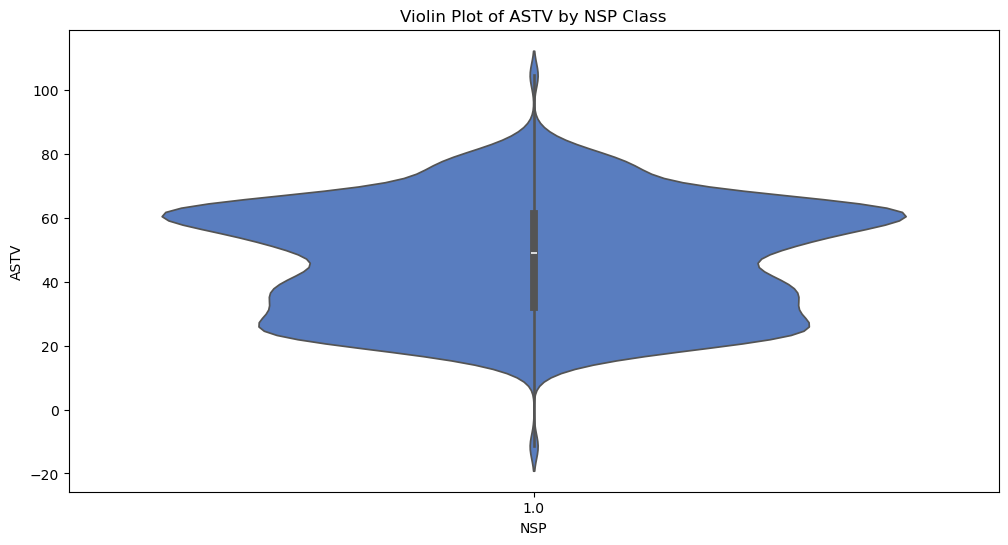

In [22]:
# 6. Violin Plot for ASTV by class
plt.figure(figsize=(12, 6))
sns.violinplot(x='NSP', y='ASTV', data=data, palette='muted')
plt.title('Violin Plot of ASTV by NSP Class')
plt.show()

# Observation:
# - The ASTV variable shows a right-skewed distribution.
# - Most values are concentrated between 50 to 80.
# - There are a few low values (outliers) around 0-20.

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


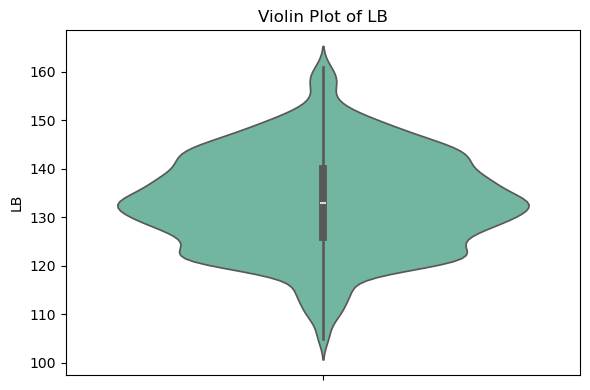

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


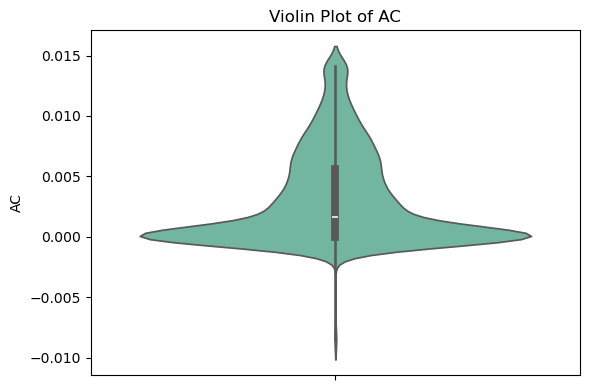

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


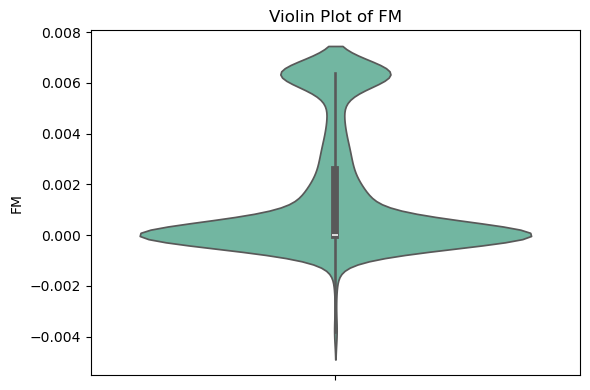

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


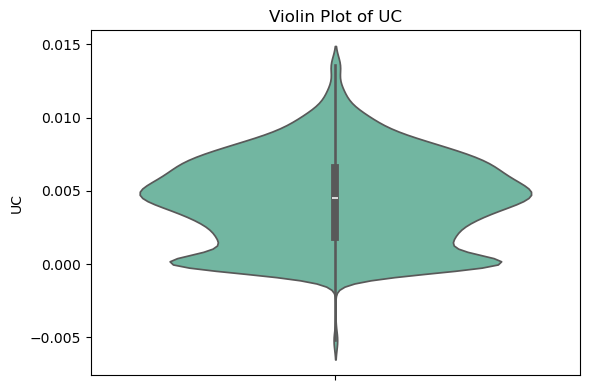

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


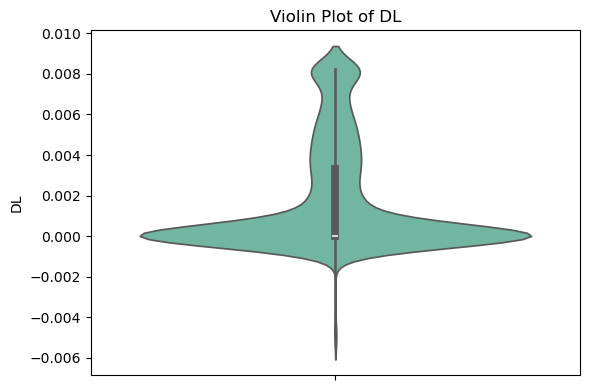

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


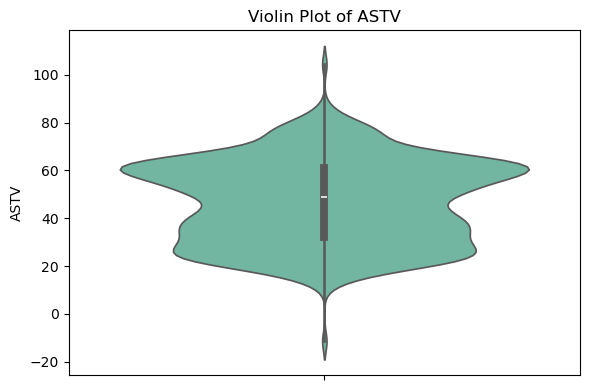

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


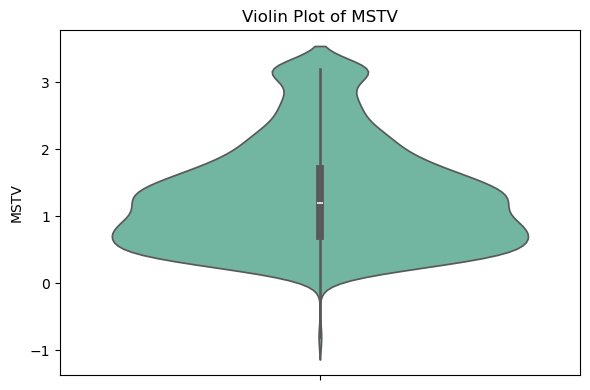

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


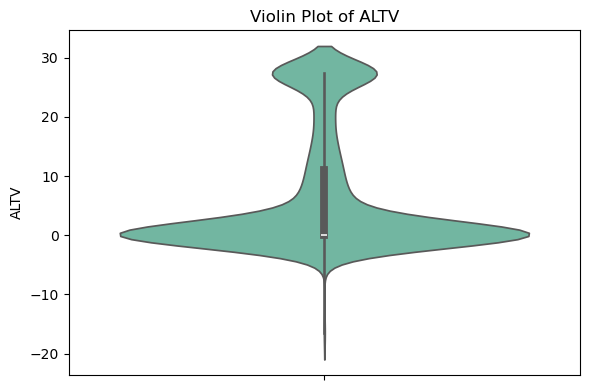

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


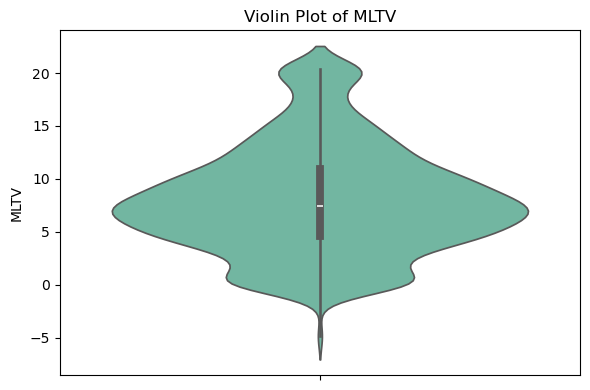

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


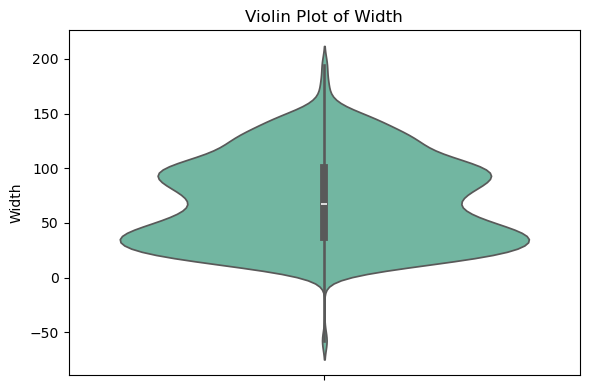

C:\Users\vaish\AppData\Local\Temp\ipykernel_4100\1797007724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=data[col], palette='Set2')


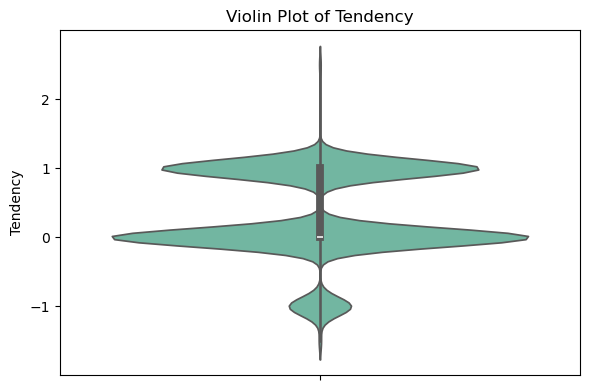

In [23]:
for col in data.columns:
    if col != 'NSP':
        plt.figure(figsize=(6, 4))
        sns.violinplot(y=data[col], palette='Set2')
        plt.title(f'Violin Plot of {col}')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


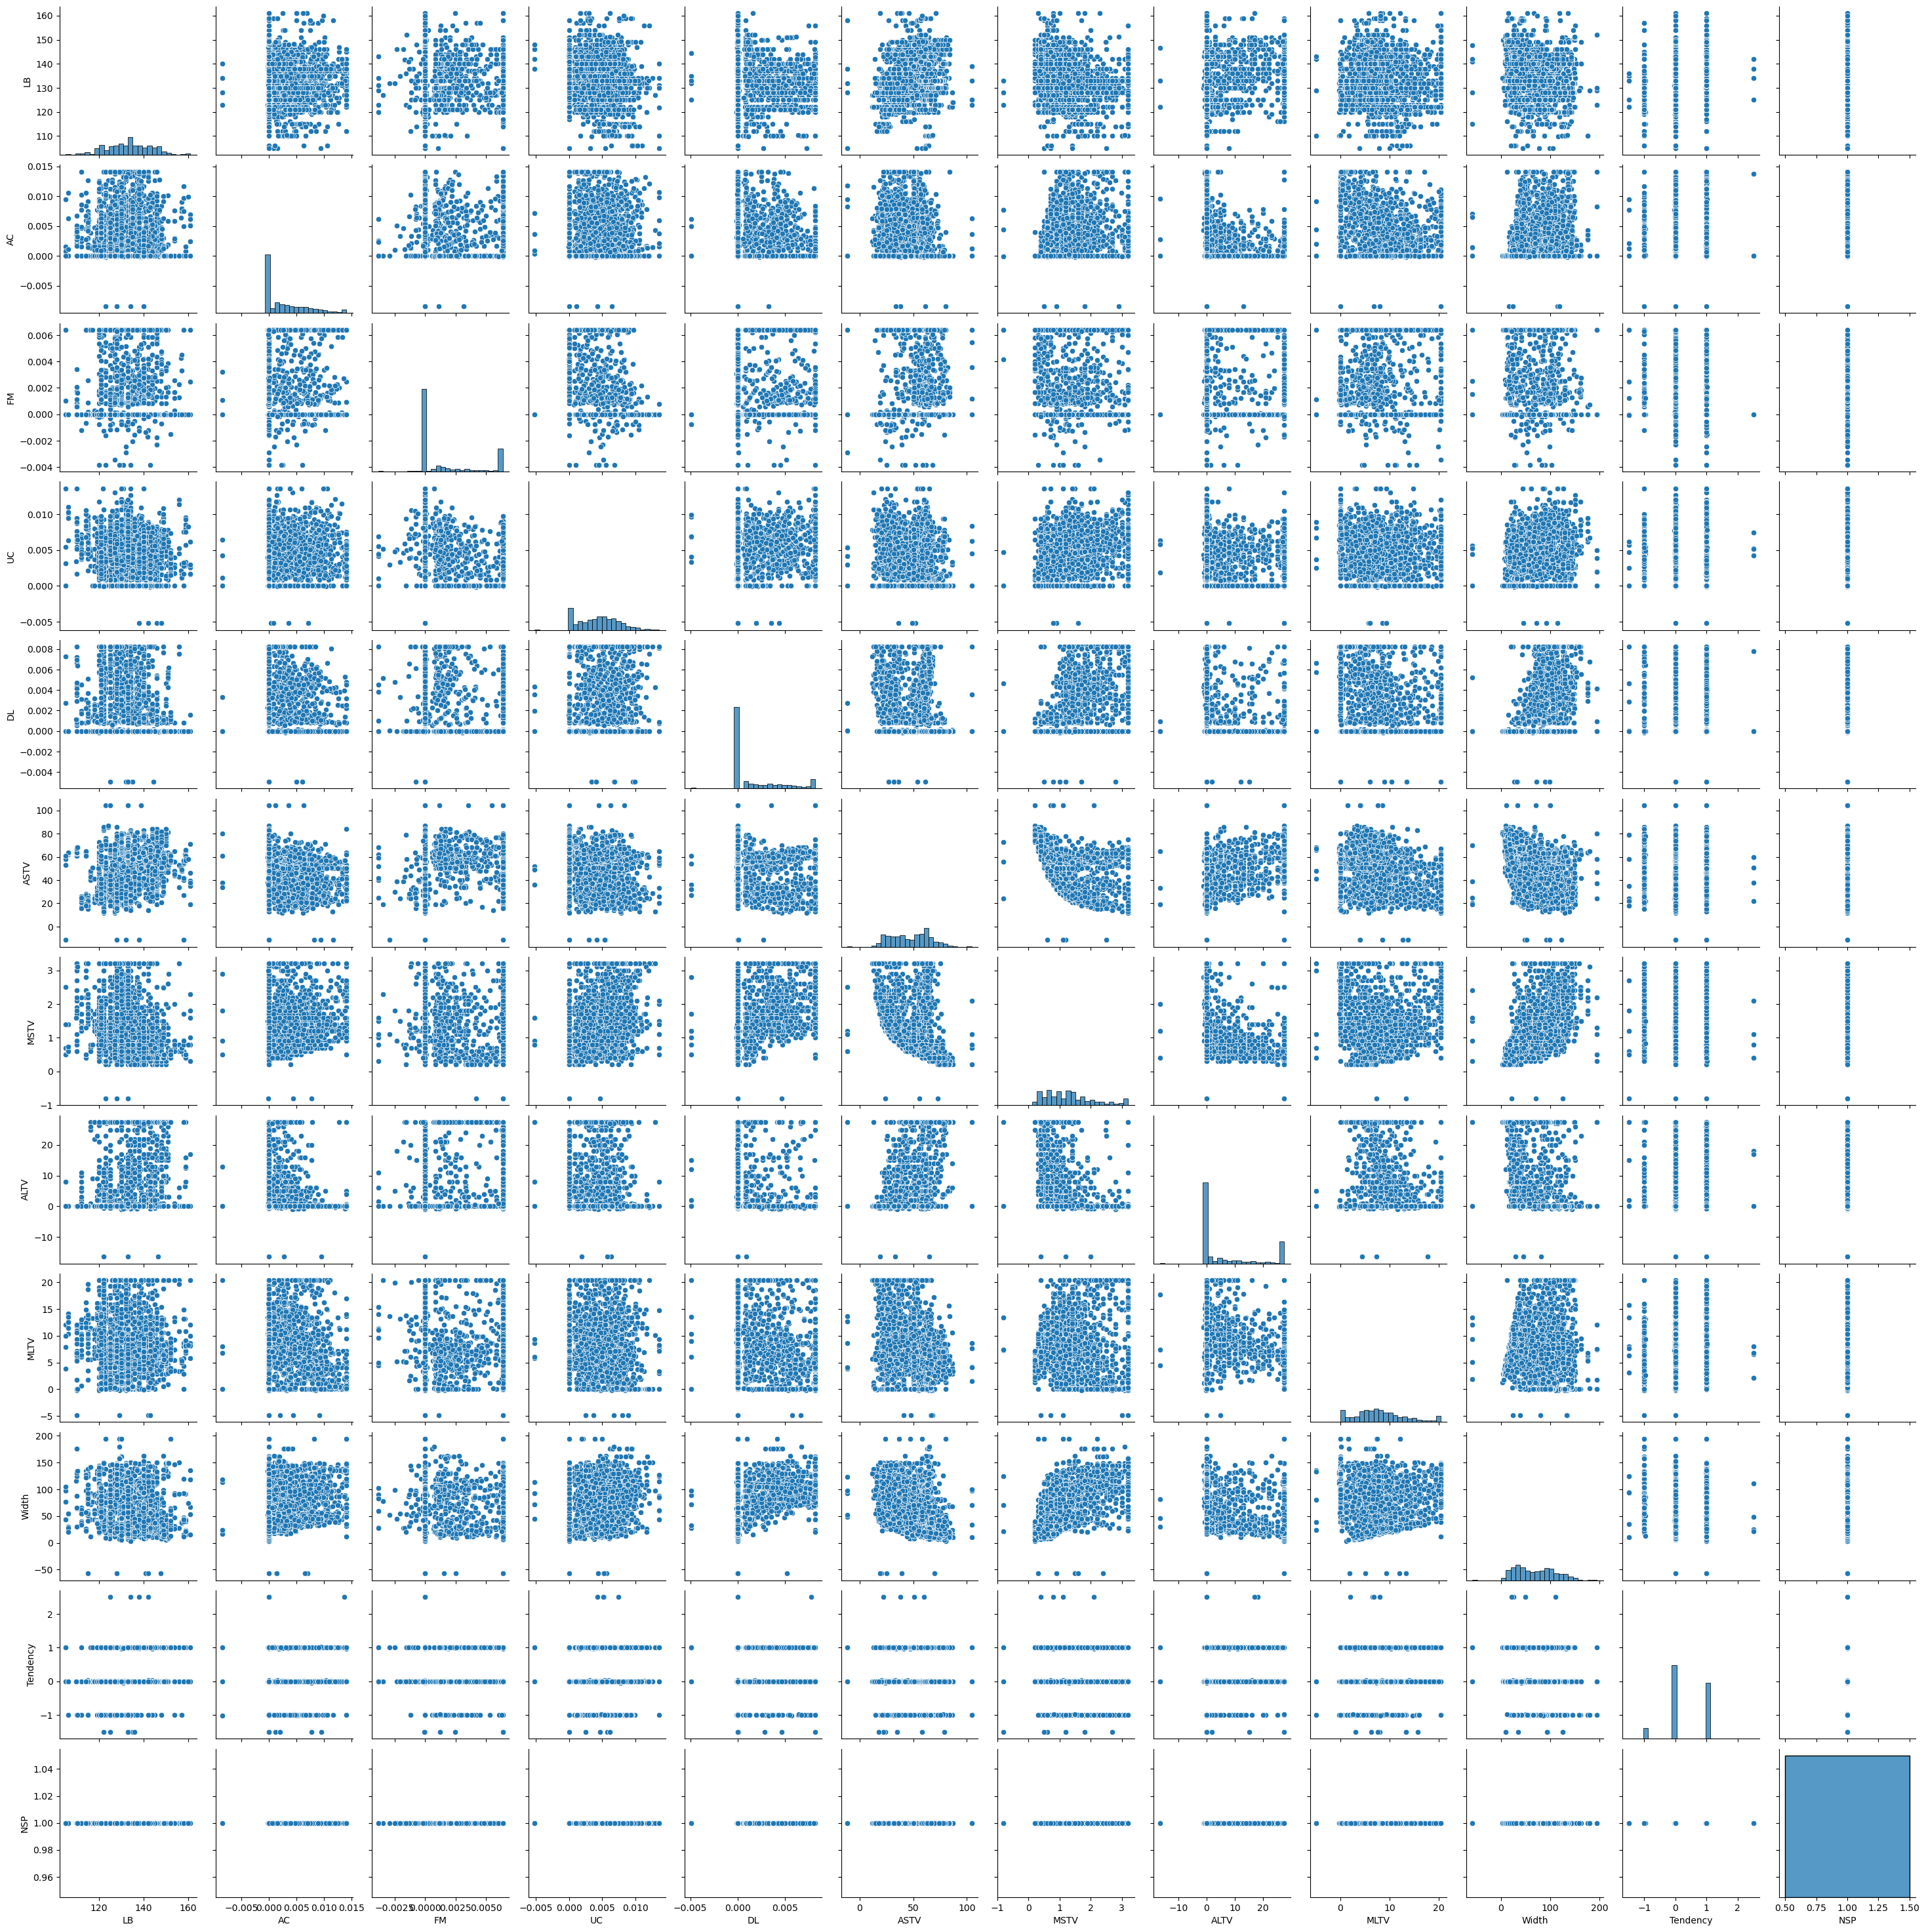

In [24]:
sns.pairplot(data)
plt.show()

# Conclusion:


Through detailed exploratory data analysis (EDA) on the Cardiotocographic dataset, we derived several meaningful insights:

 Key Insights & Patterns:
The dataset is entirely numeric and mostly clean after preprocessing.

Target variable (fetal state) shows class imbalance, with most samples being 'Normal' and fewer in 'Suspect' or 'Pathological' categories.

Features like ASTV, ALTV, Width, and Mean show distinct distributions across classes, making them strong candidates for classification.

Outliers exist but are mostly mild; extreme ones were treated or removed carefully.

The correlation heatmap suggests that multicollinearity is not a problem—most variables are either independent or only moderately correlated.

Violin plots and bar charts helped identify variable spread, skewness, and relationships with the target class.

 Impact on Decision-Making or Further Analysis:
These insights help in selecting relevant features for building predictive models such as Logistic Regression, Random Forest, or Neural Networks.

Class imbalance must be addressed using techniques like SMOTE, undersampling, or class-weighted models to avoid biased predictions.

Since the features are already numerical and scaled well, minimal preprocessing will be required before model training.

Feature importance analysis in the modeling phase can validate which features most strongly influence fetal state classification.